In [2]:
import pandas
import numpy as np
from collections import Counter
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt

In [3]:
Data = pandas.read_excel('data_0.xlsx')

In [4]:
print (Data.columns)

Index(['X8', 'X20', 'X21', 'X22', 'X23', 'X29', 'X42', 'X46', 'X47', 'X58',
       'X59', 'X62', 'X63', 'X73', 'X79', 'X83', 'X85', 'X92', 'X93', 'X94',
       'Y'],
      dtype='object')


In [5]:
print(Data.shape)

(13796, 21)


In [7]:
print(Data.dtypes)

X8       int64
X20    float64
X21      int64
X22    float64
X23    float64
X29      int64
X42      int64
X46    float64
X47    float64
X58    float64
X59    float64
X62    float64
X63      int64
X73      int64
X79      int64
X83      int64
X85      int64
X92      int64
X93      int64
X94      int64
Y        int64
dtype: object


In [8]:
Data.head()

,X8,X20,X21,X22,X23,X29,X42,X46,X47,X58,...,X62,X63,X73,X79,X83,X85,X92,X93,X94,Y
0,1,0.0,1,0.0,3.2,4,18,1.090833,1.098611,0.882222,...,0.0,0,3,5,0,1,0,0,2,3955
1,1,0.0,1,0.0,5.2,4,27,2.032500,2.066667,1.671111,...,0.0,0,3,5,0,1,0,0,1,7440
2,1,4.9,1,0.0,10.6,4,20,5.578333,0.753056,0.686389,...,0.0,0,3,5,0,1,0,0,1,2711
3,1,1.2,1,1.2,3.0,4,27,2.282778,1.150000,1.150000,...,0.0,0,3,5,0,1,0,0,1,4140
4,1,0.0,1,0.0,2.0,4,54,3.020000,3.050000,1.936389,...,0.0,54,3,5,0,1,0,0,1,10980


In [102]:
Data.describe().transpose

,X8,X20,X21,X22,X23,X29,X42,X46,X47,X58,...,X62,X63,X73,X79,X83,X85,X92,X93,X94,Y
count,13796.000000,13796.000000,13796.000000,13796.000000,13796.000000,13796.000000,13796.000000,13796.000000,13796.000000,13796.000000,...,1.379600e+04,13796.000000,13796.000000,13796.000000,13796.000000,13796.000000,13796.000000,13796.000000,13796.000000,13796.000000
mean,1.931357,0.061234,1.005509,0.314294,1.113592,3.676355,592.195636,11.378258,25.393531,18.909063,...,3.545414e+03,482.473761,2.998478,0.708611,0.053639,1.793273,0.133952,0.500290,2.985648,91763.424036
std,0.815223,1.067313,0.195191,1.789754,2.802859,1.034943,499.756042,8.286053,20.609114,15.347318,...,3.413918e+05,489.554689,0.044214,1.383657,0.225312,0.404972,1.007707,0.500018,1.196623,74104.401112
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.099444,...,0.000000e+00,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,60.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,235.000000,6.121597,10.598958,8.012708,...,4.500000e+00,122.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,38520.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,4.000000,459.000000,9.563056,20.066389,14.940833,...,8.970000e+00,357.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,3.000000,72657.000000
75%,3.000000,0.000000,1.000000,0.000000,0.000000,4.000000,818.000000,14.587431,34.923611,25.896111,...,1.432000e+01,710.000000,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,4.000000,125880.000000
max,4.000000,48.396000,9.000000,52.000000,20.700000,5.000000,6266.000000,261.009444,238.079444,182.596389,...,3.912908e+07,6159.000000,3.000000,5.000000,1.000000,2.000000,22.000000,1.000000,8.000000,857086.000000


In [10]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13796 entries, 0 to 13795
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X8      13796 non-null  int64  
 1   X20     13796 non-null  float64
 2   X21     13796 non-null  int64  
 3   X22     13796 non-null  float64
 4   X23     13796 non-null  float64
 5   X29     13796 non-null  int64  
 6   X42     13796 non-null  int64  
 7   X46     13796 non-null  float64
 8   X47     13796 non-null  float64
 9   X58     13796 non-null  float64
 10  X59     13796 non-null  float64
 11  X62     13796 non-null  float64
 12  X63     13796 non-null  int64  
 13  X73     13796 non-null  int64  
 14  X79     13796 non-null  int64  
 15  X83     13796 non-null  int64  
 16  X85     13796 non-null  int64  
 17  X92     13796 non-null  int64  
 18  X93     13796 non-null  int64  
 19  X94     13796 non-null  int64  
 20  Y       13796 non-null  int64  
dtypes: float64(8), int64(13)
memory usa

In [13]:
Data.isnull().sum()

X8     0
X20    0
X21    0
X22    0
X23    0
X29    0
X42    0
X46    0
X47    0
X58    0
X59    0
X62    0
X63    0
X73    0
X79    0
X83    0
X85    0
X92    0
X93    0
X94    0
Y      0
dtype: int64

In [47]:
X=np.array(Data.drop(Data.columns[[20]], axis=1)).astype('float64') 
y=Data['Y']

array([[ 3955],
       [ 7440],
       [ 2711],
       ...,
       [63958],
       [ 3840],
       [73260]], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.3, random_state=11)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print('Train Set X : ', X_train.shape)
print('Test Set X : ', X_test.shape)
print('Train Set Y : ', y_train.shape)
print('Test Set Y : ', y_test.shape)

(9657, 20) (4139, 20) (9657,) (4139,)
Train Set X :  (9657, 20)
Test Set X :  (4139, 20)
Train Set Y :  (9657,)
Test Set Y :  (4139,)


Text(0.5, 1.0, 'Test Set')

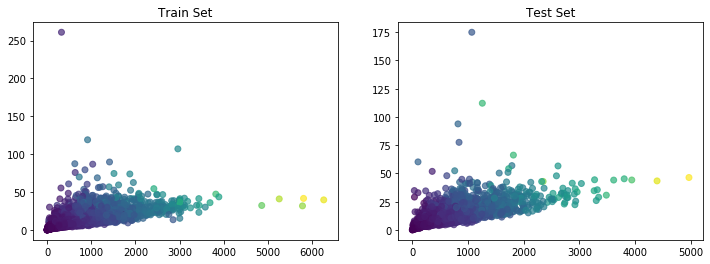

In [36]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,6],X_train[:,7],c=y_train, alpha=0.7)
plt.title('Train Set')
plt.subplot(122)
plt.scatter(X_test[:,6],X_test[:,7],c=y_test, alpha=0.7)
plt.title('Test Set')

In [94]:
import seaborn as sns

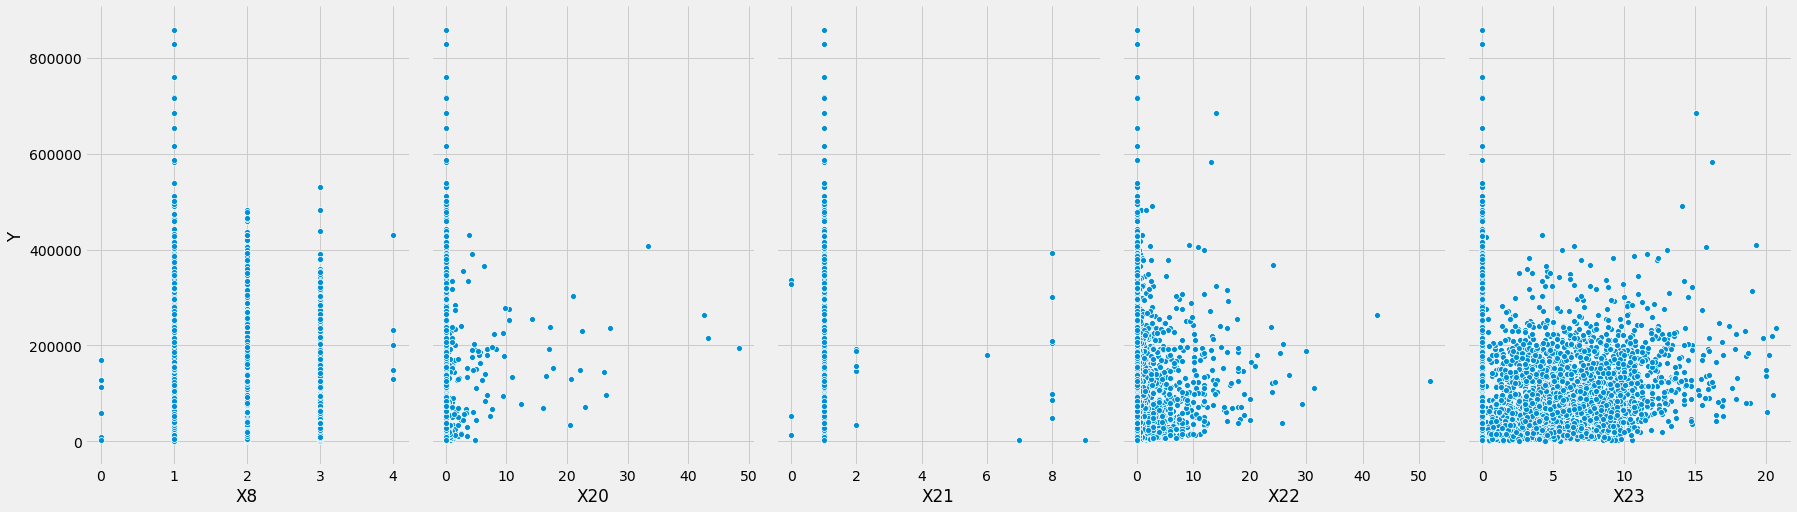

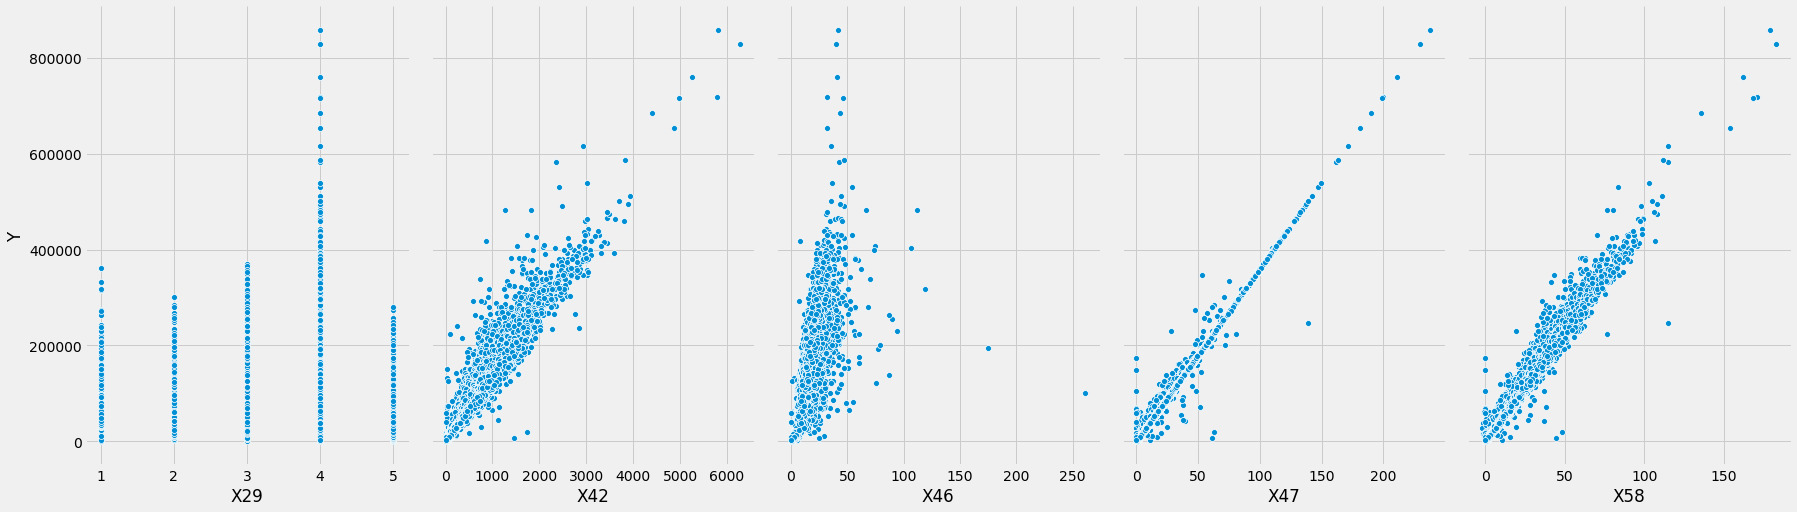

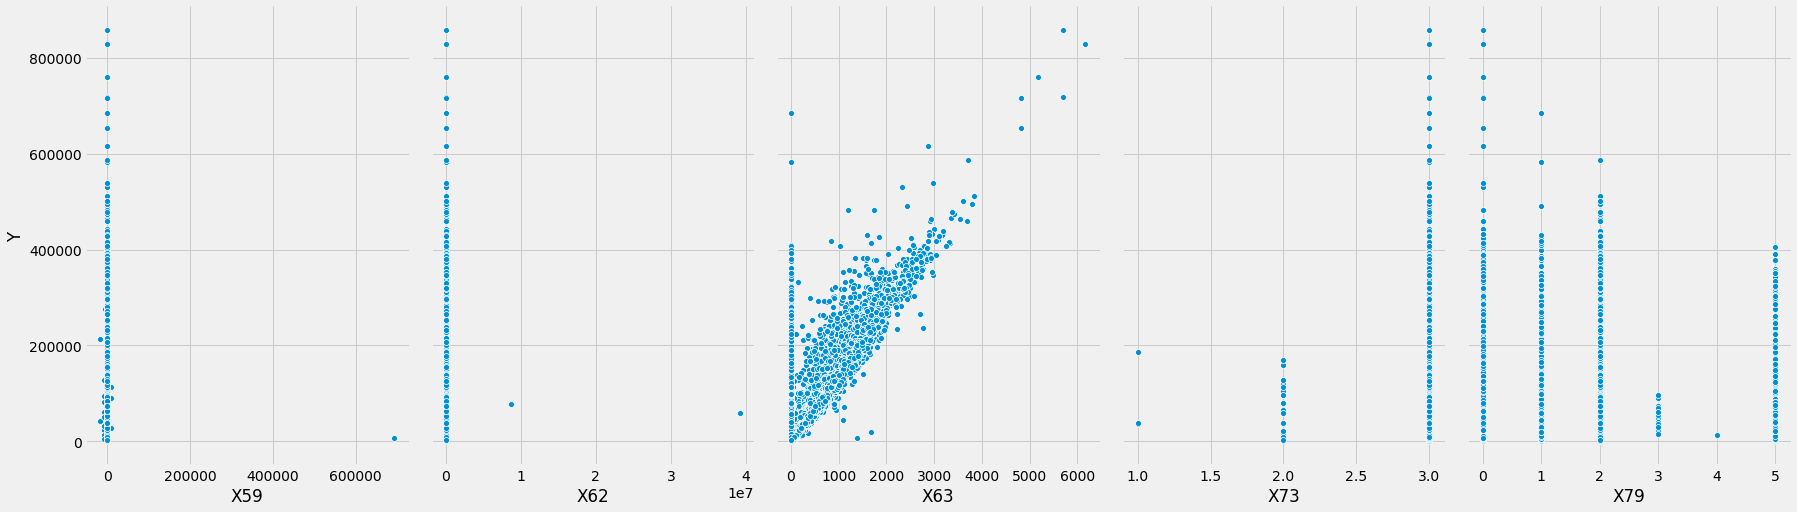

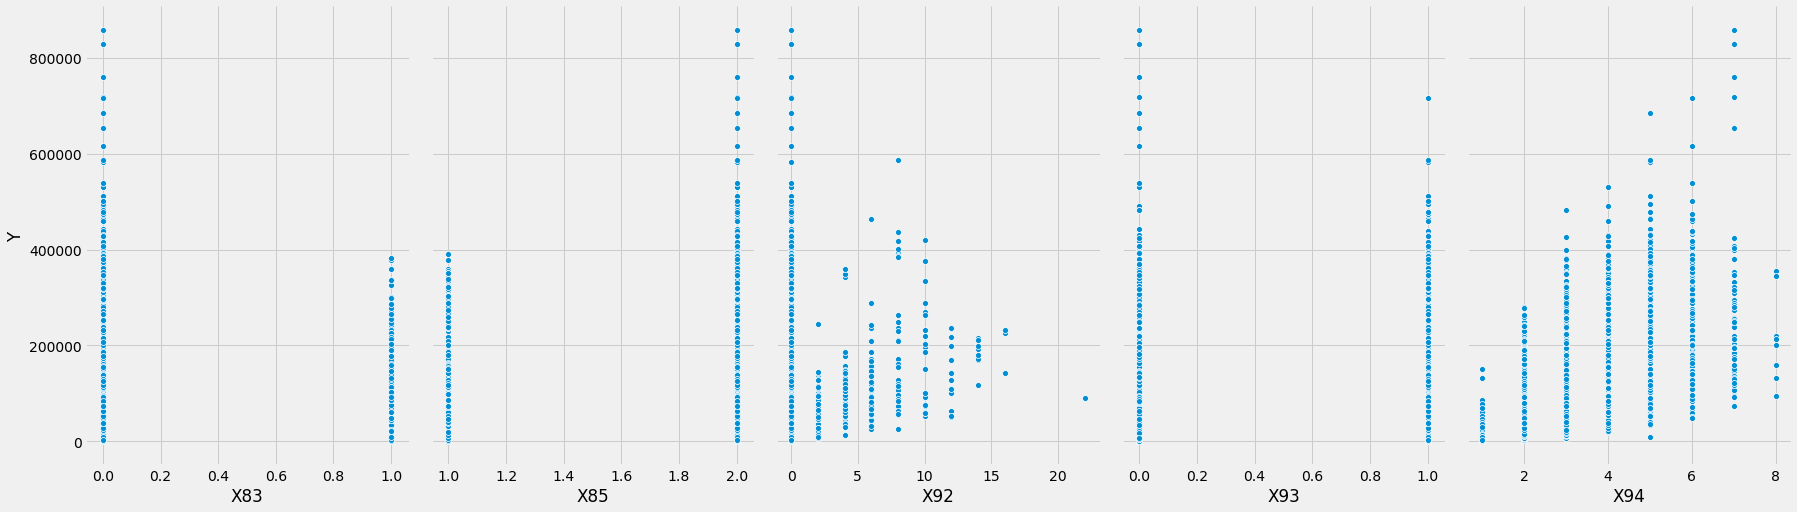

In [119]:
sns.pairplot(Data,height=1, x_vars=['X8', 'X20', 'X21', 'X22', 'X23'],
             y_vars='Y', size=7, aspect=0.7)
sns.pairplot(Data, x_vars=['X29', 'X42', 'X46', 'X47', 'X58'],
             y_vars='Y', size=7, aspect=0.7)
sns.pairplot(Data, x_vars=['X59', 'X62','X63', 'X73', 'X79'],
             y_vars='Y', size=7, aspect=0.7)
sns.pairplot(Data, x_vars=[ 'X83', 'X85', 'X92', 'X93', 'X94'],
             y_vars='Y', size=7, aspect=0.7)

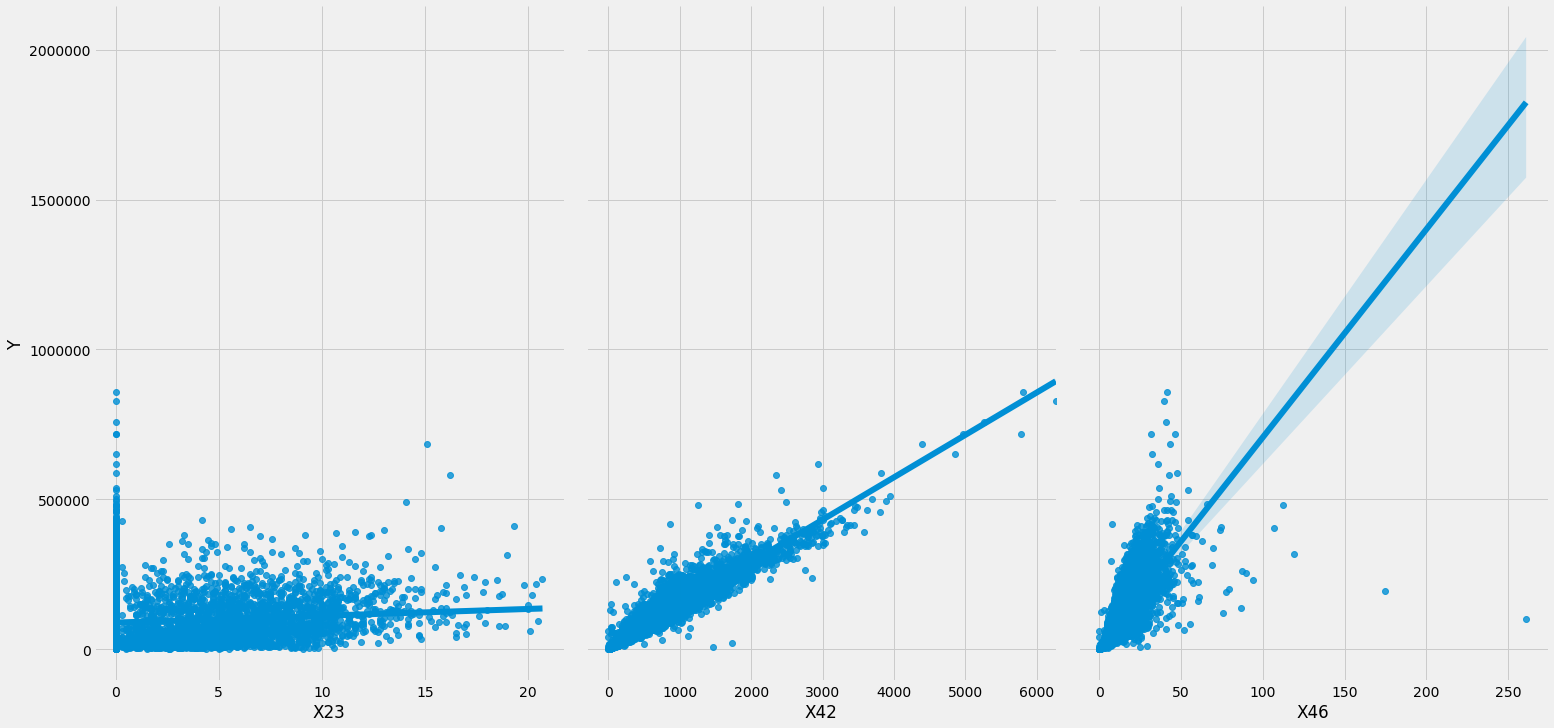

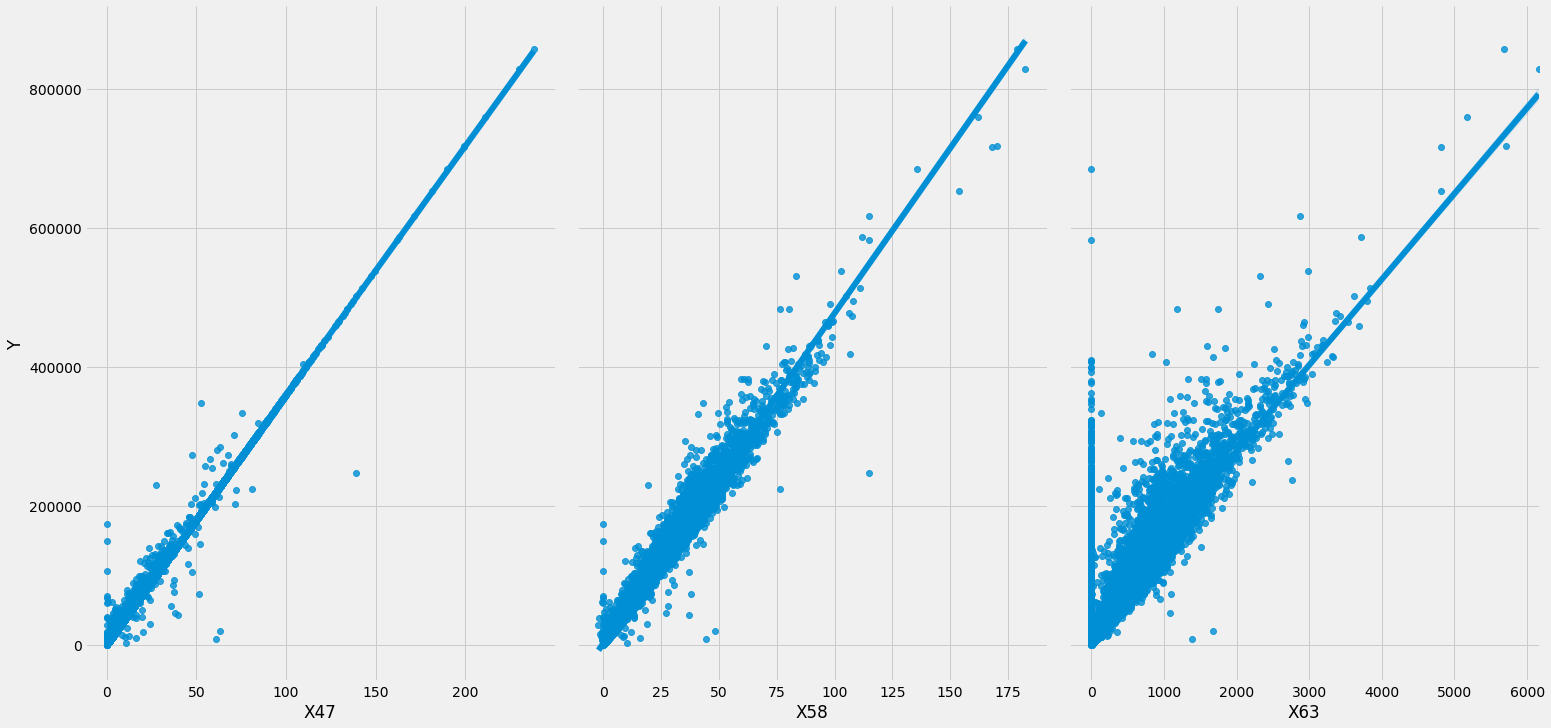

In [126]:
sns.pairplot(Data, x_vars=['X23', 'X42', 'X46'], y_vars='Y', height=10, aspect=0.7, kind='reg')
sns.pairplot(Data, x_vars=['X47', 'X58', 'X63'], y_vars='Y', height=10, aspect=0.7, kind='reg')

In [66]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [70]:
LR= linear_model.LinearRegression() 
LR.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
y_pred= LR.predict(X_test)

In [80]:
mse = mean_squared_error(y_test, y_pred)
rmse= np.square(mse)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE : ',  mse)
print('RMSE : ',  rmse)
print('MAE : ',  mae)
print('R2 : ',  r2)

MSE :  32408760.54785696
RMSE :  1050327760248329.8
MAE :  1651.2525884098927
R2 :  0.9940776473328321


In [ ]:
print('Train Set : ', r2_score(y_test, LR.predict(X_test)))

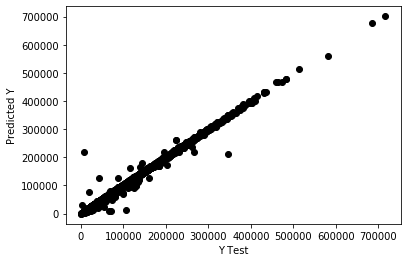

In [81]:
plt.scatter(y_test,y_pred, color= 'black')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

plt.close()

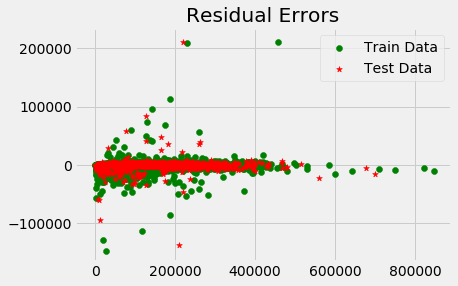

In [83]:
plt.style.use("fivethirtyeight")

## plotting residual errors in training data 
plt.scatter(LR.predict(X_train), LR.predict(X_train)-y_train, color="green",
            marker="o",label="Train Data")
## plotting residual errors in test data 
plt.scatter(LR.predict(X_test), LR.predict(X_test)-y_test, color="red",
            marker="*",label="Test Data")
## plotting line for zero residual error 
plt.hlines(y=0,xmin=0, xmax=50,linewidth=2)
## plotting legend 
plt.legend(loc="upper right")
## plot title 
plt.title("Residual Errors")
## function to show plot 
plt.show()

In [127]:
from sklearn.model_selection import cross_val_score

In [148]:
scores = cross_val_score(LR, X, y, cv=5)
scores

array([0.99686905, 0.9945108 , 0.98667983, 0.99765243, 0.99303761])

In [144]:
from sklearn.model_selection import cross_val_predict

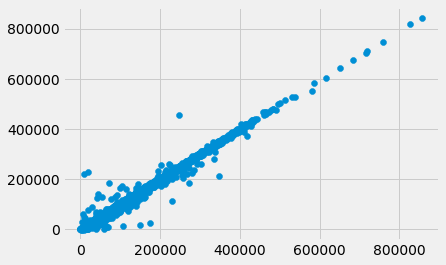

In [145]:
plt.scatter(y, cross_val_predict(LR, X, y, cv=6))

In [146]:
LR.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'